In [1]:
import torch
import os, sys
import numpy as np
parent_dir = os.path.abspath('../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
os.environ['CUDA_VISIBLE_DEVICES']='2'

tensor(-1.9420e-05)


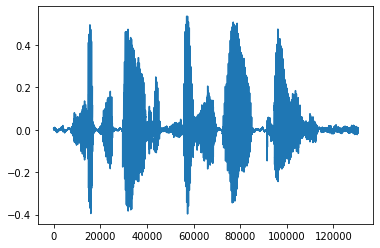

In [2]:
import torchaudio
import matplotlib.pyplot as plt
import torch
import torchaudio.functional as aF
audio_path = '/root/VCTK-Corpus/wav48/p227/p227_003.wav'
audio, fs = torchaudio.load(audio_path)
K = 50000
audio_seg = audio[...,K:130560+K].squeeze().type(torch.FloatTensor)
print(audio_seg.mean())
plt.plot(audio_seg)
plt.show()

In [3]:
from models.networks import define_D
from util.util import kbdwin
D_network = define_D(1, ndf=64, n_layers_D=3, norm='instance',num_D = 3, getIntermFeat=True, gpu_ids=[0], use_sigmoid=True, D_type='multires', window=kbdwin, base_nfft=1024, mdct_type='4')
audio_seg.requires_grad = True
res = D_network.forward(audio_seg.unsqueeze(0).cuda())
print(res)


MultiResolutionDiscriminator(
  (scale0_layer0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer4): Sequential

In [4]:
from models.networks import print_network
print_network(D_network)

MultiResolutionDiscriminator(
  (scale0_layer0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (scale0_layer4): Sequential